# This notebook may be used to produce the quantile-probability plot in Fig. 7

In [1]:
#import libraries
import numpy as np
from math import exp,sqrt,log, pi, sin, cos
import math
import numpy.random as rand
import timeit

from scipy.interpolate import spline

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
   sys.path.append(nb_dir)
import timeit

from scipy.stats import chi2
from scipy.fftpack import fft, fft2
from scipy.signal import argrelextrema

from scipy import signal

### import data:

In [2]:
f1 = [2.0, 2.4, 4.0, 4.8]
f2 = [2.0, 1.6, 4.0, 3.2]
m1 = [1.0, 2.0, 1.14, 2.29]
m2 = [1.0, 2.0, 0.86, 1.71]

ID_LETT = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
ID_LETT_INDEX = 0

f_index_range = 4
m_index_range = 4

choose_fcond = 1 #0 or 1
choiceCross = []
DTcross = []
choiceMddm = []
DTmddm = []
#filepath = 'DistributionDTData_Continuous_Mag1_' + str(choose_m1) + '_Mag2_' + str(m2)

for f_index in range(f_index_range):
    for m_index in range(m_index_range):
        choose_f1 = f1[f_index]
        choose_f2 = f2[f_index]
        choose_m1 = m1[m_index]
        choose_m2 = m2[m_index]
        print(str(ID_LETT[ID_LETT_INDEX])+': ' , 'f1 = ', choose_f1, 'f2 = ', choose_f2, 'rho_f = ', choose_f1/choose_f2, 'm1 = ', choose_m1, 'm2 = ', choose_m2, 'rho_m = ', choose_m1/choose_m2)
        filepath = '../DataGeneration/DataFiles/DistributionDTData_Freq1_' + str(choose_f1) + '_Freq2_' + str(choose_f2) + '_Mag1_' + str(choose_m1) + '_Mag2_' + str(choose_m2) + '_FreqCond_' + str(choose_fcond)
        with open(str(filepath) + '.csv', 'r') as infile:
            infile.readline
            for line in infile:
                if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                    choiceCross.append(float(line.split(',')[0]))
                    DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
                    choiceMddm.append(float(line.split(',')[2]))
                    DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 
        ID_LETT_INDEX += 1
                    

A:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  1.0 m2 =  1.0 rho_m =  1.0
B:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
C:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
D:  f1 =  2.0 f2 =  2.0 rho_f =  1.0 m1 =  2.29 m2 =  1.71 rho_m =  1.3391812865497077
E:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  1.0 m2 =  1.0 rho_m =  1.0
F:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  2.0 m2 =  2.0 rho_m =  1.0
G:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
H:  f1 =  2.4 f2 =  1.6 rho_f =  1.4999999999999998 m1 =  2.29 m2 =  1.71 rho_m =  1.3391812865497077
I:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  1.0 m2 =  1.0 rho_m =  1.0
J:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
K:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  1.14 m2 =  0.86 rho_m =  1.3255813953488371
L:  f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.29 m2 =  1.71 rho_m =  1.339181286549707

In [272]:
tlen = 100000
DTcross = np.asarray(DTcross)
DTmddm = np.asarray(DTmddm)

choiceCrossA = choiceCross[0:tlen]
DTcrossA = DTcross[0:tlen]
choiceCrossB = choiceCross[tlen:2*tlen]
DTcrossB = DTcross[tlen:2*tlen]
choiceCrossC = choiceCross[2*tlen:3*tlen]
DTcrossC = DTcross[2*tlen:3*tlen]
choiceCrossD = choiceCross[3*tlen:4*tlen]
DTcrossD = DTcross[3*tlen:4*tlen]
choiceCrossE = choiceCross[4*tlen:5*tlen]
DTcrossE = DTcross[4*tlen:5*tlen]
choiceCrossF = choiceCross[5*tlen:6*tlen]
DTcrossF = DTcross[5*tlen:6*tlen]
choiceCrossG = choiceCross[6*tlen:7*tlen]
DTcrossG = DTcross[6*tlen:7*tlen]
choiceCrossH = choiceCross[7*tlen:8*tlen]
DTcrossH = DTcross[7*tlen:8*tlen]
choiceCrossI = choiceCross[8*tlen:9*tlen]
DTcrossI = DTcross[8*tlen:9*tlen]
choiceCrossJ = choiceCross[9*tlen:10*tlen]
DTcrossJ = DTcross[9*tlen:10*tlen]
choiceCrossK = choiceCross[10*tlen:11*tlen]
DTcrossK = DTcross[10*tlen:11*tlen]
choiceCrossL = choiceCross[11*tlen:12*tlen]
DTcrossL = DTcross[11*tlen:12*tlen]
choiceCrossM = choiceCross[12*tlen:13*tlen]
DTcrossM = DTcross[12*tlen:13*tlen]
choiceCrossN = choiceCross[13*tlen:14*tlen]
DTcrossN = DTcross[13*tlen:14*tlen]
choiceCrossO = choiceCross[14*tlen:15*tlen]
DTcrossO = DTcross[14*tlen:15*tlen]
choiceCrossP = choiceCross[15*tlen:16*tlen]
DTcrossP = DTcross[15*tlen:16*tlen]

choiceMddmA = choiceMddm[0:tlen]
DTmddmA = DTmddm[0:tlen]
choiceMddmB = choiceMddm[tlen:2*tlen]
DTmddmB = DTmddm[tlen:2*tlen]
choiceMddmC = choiceMddm[2*tlen:3*tlen]
DTmddmC = DTmddm[2*tlen:3*tlen]
choiceMddmD = choiceMddm[3*tlen:4*tlen]
DTmddmD = DTmddm[3*tlen:4*tlen]
choiceMddmE = choiceMddm[4*tlen:5*tlen]
DTmddmE = DTmddm[4*tlen:5*tlen]
choiceMddmF = choiceMddm[5*tlen:6*tlen]
DTmddmF = DTmddm[5*tlen:6*tlen]
choiceMddmG = choiceMddm[6*tlen:7*tlen]
DTmddmG = DTmddm[6*tlen:7*tlen]
choiceMddmH = choiceMddm[7*tlen:8*tlen]
DTmddmH = DTmddm[7*tlen:8*tlen]
choiceMddmI = choiceMddm[8*tlen:9*tlen]
DTmddmI = DTmddm[8*tlen:9*tlen]
choiceMddmJ = choiceMddm[9*tlen:10*tlen]
DTmddmJ = DTmddm[9*tlen:10*tlen]
choiceMddmK = choiceMddm[10*tlen:11*tlen]
DTmddmK = DTmddm[10*tlen:11*tlen]
choiceMddmL = choiceMddm[11*tlen:12*tlen]
DTmddmL = DTmddm[11*tlen:12*tlen]
choiceMddmM = choiceMddm[12*tlen:13*tlen]
DTmddmM = DTmddm[12*tlen:13*tlen]
choiceMddmN = choiceMddm[13*tlen:14*tlen]
DTmddmN = DTmddm[13*tlen:14*tlen]
choiceMddmO = choiceMddm[14*tlen:15*tlen]
DTmddmO = DTmddm[14*tlen:15*tlen]
choiceMddmP = choiceMddm[15*tlen:16*tlen]
DTmddmP = DTmddm[15*tlen:16*tlen]

ListChoice_mDDM = [choiceMddmA, choiceMddmB, choiceMddmC, choiceMddmD, choiceMddmE, choiceMddmF, choiceMddmG,
                  choiceMddmH, choiceMddmI, choiceMddmJ, choiceMddmK, choiceMddmL, choiceMddmM, choiceMddmN,
                  choiceMddmO, choiceMddmP]
ListDT_mDDM = [DTmddmA, DTmddmB, DTmddmC, DTmddmD, DTmddmE, DTmddmF, DTmddmG, DTmddmH,
              DTmddmI, DTmddmJ, DTmddmK, DTmddmL, DTmddmM, DTmddmN, DTmddmO, DTmddmP]
ListChoice_cross = [choiceCrossA, choiceCrossB, choiceCrossC, choiceCrossD, choiceCrossE, choiceCrossF, choiceCrossG,
                   choiceCrossH, choiceCrossI, choiceCrossJ, choiceCrossK, choiceCrossL, choiceCrossM, choiceCrossN,
                   choiceCrossO, choiceCrossP]
ListDT_cross = [DTcrossA, DTcrossB, DTcrossC, DTcrossD, DTcrossE, DTcrossF, DTcrossG, DTcrossH,
               DTcrossI, DTcrossJ, DTcrossK, DTcrossL, DTcrossM, DTcrossN, DTcrossO, DTcrossP]
ListCond = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P"]

dictPercentiles_opt1 = {}
dictPercentiles_opt2 = {}
dictAccuracy = {}
dictExclusionRate = {}
for jjj in range(len(ListChoice_mDDM)):
    DT = ListDT_mDDM[jjj]
    choice = ListChoice_mDDM[jjj]
    DTopt1 = [DT[kk] for kk in range(len(DT)) if choice[kk]==1]
    DTopt2 = [DT[kk] for kk in range(len(DT)) if choice[kk]==2]
    perc10_DTopt1 = np.percentile(DTopt1, 10, axis=0, interpolation='linear')
    perc30_DTopt1 = np.percentile(DTopt1, 30, axis=0, interpolation='linear')
    perc50_DTopt1 = np.percentile(DTopt1, 50, axis=0, interpolation='linear')
    perc70_DTopt1 = np.percentile(DTopt1, 70, axis=0, interpolation='linear')
    perc90_DTopt1 = np.percentile(DTopt1, 90, axis=0, interpolation='linear')
    perc10_DTopt2 = np.percentile(DTopt2, 10, axis=0, interpolation='linear')
    perc30_DTopt2 = np.percentile(DTopt2, 30, axis=0, interpolation='linear')
    perc50_DTopt2 = np.percentile(DTopt2, 50, axis=0, interpolation='linear')
    perc70_DTopt2 = np.percentile(DTopt2, 70, axis=0, interpolation='linear')
    perc90_DTopt2 = np.percentile(DTopt2, 90, axis=0, interpolation='linear')
    dictPercentiles_opt1["mDDM_"+str(ListCond[jjj])] = np.array([perc10_DTopt1, perc30_DTopt1, 
                                                                    perc50_DTopt1, perc70_DTopt1, perc90_DTopt1])
    dictPercentiles_opt2["mDDM_"+str(ListCond[jjj])] = np.array([perc10_DTopt2, perc30_DTopt2, 
                                                                    perc50_DTopt2, perc70_DTopt2, perc90_DTopt2])
    dictAccuracy["mDDM_"+str(ListCond[jjj])] = len(DTopt1)/(len(DTopt1)+len(DTopt2))
    dictExclusionRate["mDDM_"+str(ListCond[jjj])] = 1 - (len(DTopt1)+len(DTopt2))/len(DT)
    
for jjj in range(len(ListChoice_cross)):
    DT = ListDT_cross[jjj]
    choice = ListChoice_cross[jjj]
    DTopt1 = [DT[kk] for kk in range(len(DT)) if choice[kk]==1]
    DTopt2 = [DT[kk] for kk in range(len(DT)) if choice[kk]==2]
    perc10_DTopt1 = np.percentile(DTopt1, 10, axis=0, interpolation='linear')
    perc30_DTopt1 = np.percentile(DTopt1, 30, axis=0, interpolation='linear')
    perc50_DTopt1 = np.percentile(DTopt1, 50, axis=0, interpolation='linear')
    perc70_DTopt1 = np.percentile(DTopt1, 70, axis=0, interpolation='linear')
    perc90_DTopt1 = np.percentile(DTopt1, 90, axis=0, interpolation='linear')
    perc10_DTopt2 = np.percentile(DTopt2, 10, axis=0, interpolation='linear')
    perc30_DTopt2 = np.percentile(DTopt2, 30, axis=0, interpolation='linear')
    perc50_DTopt2 = np.percentile(DTopt2, 50, axis=0, interpolation='linear')
    perc70_DTopt2 = np.percentile(DTopt2, 70, axis=0, interpolation='linear')
    perc90_DTopt2 = np.percentile(DTopt2, 90, axis=0, interpolation='linear')
    dictPercentiles_opt1["cross_"+str(ListCond[jjj])] = np.array([perc10_DTopt1, perc30_DTopt1, 
                                                                    perc50_DTopt1, perc70_DTopt1, perc90_DTopt1])
    dictPercentiles_opt2["cross_"+str(ListCond[jjj])] = np.array([perc10_DTopt2, perc30_DTopt2, 
                                                                    perc50_DTopt2, perc70_DTopt2, perc90_DTopt2])
    dictAccuracy["cross_"+str(ListCond[jjj])] = len(DTopt1)/(len(DTopt1)+len(DTopt2))
    dictExclusionRate["cross_"+str(ListCond[jjj])] = 1 - (len(DTopt1)+len(DTopt2))/len(DT)

### Generate plot:

<IPython.core.display.Javascript object>


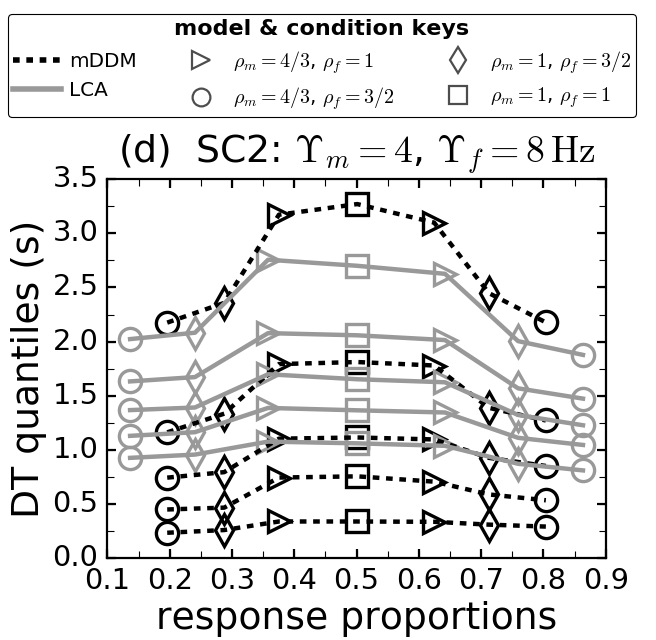

In [279]:
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8.2, 8))

nr_row = 1#3
nr_col = 1
bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)
mSize = 20
mEwidth = 3

#condColor = ['dimgrey', 'r', 'b', 'gold']
condColor = ['0','0.6']
modSymbol = ['s', 'd', '>', 'o', 'd', '+']

DTunit = 'second' # 'second' or 'millisecond'
DTunitShort = 's'
if DTunit == 'millisecond':
    convFact = 1000
    DTunitShort = 'ms'
else:
    convFact = 1

acc_mDDM = []
perc1_mDDM = []
perc2_mDDM = []
perc3_mDDM = []
perc4_mDDM = []
perc5_mDDM = []

acc_cross = []
perc1_cross = []
perc2_cross = []
perc3_cross = []
perc4_cross = []
perc5_cross = []

ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)    
counter = 0

idNr_list = ['J', 'N', 'L', 'P']
#idNr_list = ['A', 'E', 'C', 'G']

for idNr in idNr_list:
    ax1.plot([dictAccuracy['mDDM_'+str(idNr)] for kk in range(len(dictPercentiles_opt1['mDDM_'+str(idNr)]))],
             convFact*dictPercentiles_opt1['mDDM_'+str(idNr)],
             modSymbol[counter], ms=mSize, markerfacecolor='none', markeredgewidth = mEwidth, markeredgecolor=condColor[0])
    acc_mDDM.append(dictAccuracy['mDDM_'+str(idNr)])
    perc1_mDDM.append(dictPercentiles_opt1['mDDM_'+str(idNr)][0])
    perc2_mDDM.append(dictPercentiles_opt1['mDDM_'+str(idNr)][1])
    perc3_mDDM.append(dictPercentiles_opt1['mDDM_'+str(idNr)][2])
    perc4_mDDM.append(dictPercentiles_opt1['mDDM_'+str(idNr)][3])
    perc5_mDDM.append(dictPercentiles_opt1['mDDM_'+str(idNr)][4])
    if idNr != 'J' and idNr != 'A':
        ax1.plot([1-dictAccuracy['mDDM_'+str(idNr)] for kk in range(len(dictPercentiles_opt2['mDDM_'+str(idNr)]))],
                 convFact*dictPercentiles_opt2['mDDM_'+str(idNr)],
                 modSymbol[counter], ms=mSize, markerfacecolor='none', markeredgewidth = mEwidth, markeredgecolor=condColor[0])
        acc_mDDM.append(1-dictAccuracy['mDDM_'+str(idNr)])
        perc1_mDDM.append(dictPercentiles_opt2['mDDM_'+str(idNr)][0])
        perc2_mDDM.append(dictPercentiles_opt2['mDDM_'+str(idNr)][1])
        perc3_mDDM.append(dictPercentiles_opt2['mDDM_'+str(idNr)][2])
        perc4_mDDM.append(dictPercentiles_opt2['mDDM_'+str(idNr)][3])
        perc5_mDDM.append(dictPercentiles_opt2['mDDM_'+str(idNr)][4])
    
    ax1.plot([dictAccuracy['cross_'+str(idNr)] for kk in range(len(dictPercentiles_opt1['cross_'+str(idNr)]))],
             convFact*dictPercentiles_opt1['cross_'+str(idNr)],
             modSymbol[counter], ms=mSize, markerfacecolor='none', markeredgewidth = mEwidth, markeredgecolor=condColor[1])
    acc_cross.append(dictAccuracy['cross_'+str(idNr)])
    perc1_cross.append(dictPercentiles_opt1['cross_'+str(idNr)][0])
    perc2_cross.append(dictPercentiles_opt1['cross_'+str(idNr)][1])
    perc3_cross.append(dictPercentiles_opt1['cross_'+str(idNr)][2])
    perc4_cross.append(dictPercentiles_opt1['cross_'+str(idNr)][3])
    perc5_cross.append(dictPercentiles_opt1['cross_'+str(idNr)][4])
    if idNr != 'J' and idNr != 'A':
        ax1.plot([1-dictAccuracy['cross_'+str(idNr)] for kk in range(len(dictPercentiles_opt2['cross_'+str(idNr)]))],
                 convFact*dictPercentiles_opt2['cross_'+str(idNr)],
                 modSymbol[counter], ms=mSize, markerfacecolor='none', markeredgewidth = mEwidth, markeredgecolor=condColor[1])
        acc_cross.append(1-dictAccuracy['cross_'+str(idNr)])
        perc1_cross.append(dictPercentiles_opt2['cross_'+str(idNr)][0])
        perc2_cross.append(dictPercentiles_opt2['cross_'+str(idNr)][1])
        perc3_cross.append(dictPercentiles_opt2['cross_'+str(idNr)][2])
        perc4_cross.append(dictPercentiles_opt2['cross_'+str(idNr)][3])
        perc5_cross.append(dictPercentiles_opt2['cross_'+str(idNr)][4])
    
    counter += 1

sortedAcc_mDDM = np.sort(acc_mDDM)
inds = np.asarray(acc_mDDM).argsort()
sortedPerc1_mDDM = np.asarray(perc1_mDDM)[inds]
sortedPerc2_mDDM = np.asarray(perc2_mDDM)[inds]
sortedPerc3_mDDM = np.asarray(perc3_mDDM)[inds]
sortedPerc4_mDDM = np.asarray(perc4_mDDM)[inds]
sortedPerc5_mDDM = np.asarray(perc5_mDDM)[inds]
ax1.plot(sortedAcc_mDDM, convFact*sortedPerc1_mDDM, ls="--", c=condColor[0], lw=4)
ax1.plot(sortedAcc_mDDM, convFact*sortedPerc2_mDDM, ls="--", c=condColor[0], lw=4)
ax1.plot(sortedAcc_mDDM, convFact*sortedPerc3_mDDM, ls="--", c=condColor[0], lw=4)
ax1.plot(sortedAcc_mDDM, convFact*sortedPerc4_mDDM, ls="--", c=condColor[0], lw=4)
ax1.plot(sortedAcc_mDDM, convFact*sortedPerc5_mDDM, ls="--", c=condColor[0], lw=4)

sortedAcc_cross = np.sort(acc_cross)
inds = np.asarray(acc_cross).argsort()
sortedPerc1_cross = np.asarray(perc1_cross)[inds]
sortedPerc2_cross = np.asarray(perc2_cross)[inds]
sortedPerc3_cross = np.asarray(perc3_cross)[inds]
sortedPerc4_cross = np.asarray(perc4_cross)[inds]
sortedPerc5_cross = np.asarray(perc5_cross)[inds]
ax1.plot(sortedAcc_cross, convFact*sortedPerc1_cross, ls="-", c=condColor[1], lw=4)
ax1.plot(sortedAcc_cross, convFact*sortedPerc2_cross, ls="-", c=condColor[1], lw=4)
ax1.plot(sortedAcc_cross, convFact*sortedPerc3_cross, ls="-", c=condColor[1], lw=4)
ax1.plot(sortedAcc_cross, convFact*sortedPerc4_cross, ls="-", c=condColor[1], lw=4)
ax1.plot(sortedAcc_cross, convFact*sortedPerc5_cross, ls="-", c=condColor[1], lw=4)

    
#customise legend
chooseDataModelLegend = 'mDDM'
legend_elements_models = [Line2D([0], [0], color=condColor[0], ls='--', lw=5, label = 'mDDM'),
                   Line2D([0], [0], color=condColor[1], ls='-', lw=5, label = 'LCA'),
                   Line2D([0], [0], color='0.3', marker=modSymbol[2], ms=16, ls='None', markerfacecolor='none', 
                          markeredgewidth = 2, markeredgecolor='0.3', label = r'$\rho_m=4/3$, $\rho_f=1$'),
                   Line2D([0], [0], color='0.3', marker=modSymbol[3], ms=16, ls='None', markerfacecolor='none', 
                          markeredgewidth = 2, markeredgecolor='0.3', label = r'$\rho_m=4/3$, $\rho_f=3/2$'),
                   Line2D([0], [0], color='0.3', marker=modSymbol[1], ms=16, ls='None', markerfacecolor='none', 
                          markeredgewidth = 2, markeredgecolor='0.3', label = r'$\rho_m=1$, $\rho_f=3/2$'),
                   Line2D([0], [0], color='0.3', marker=modSymbol[0], ms=16, ls='None', markerfacecolor='none', 
                          markeredgewidth = 2, markeredgecolor='0.3', label = r'$\rho_m=1$, $\rho_f=1$')]

#legend_elements_conditions = [Line2D([0], [0], color=condColor[kk], ls='solid', lw=14, label = condList[kk]) 
#                              for kk in range(len(condList))]


#ax1.legend(loc='center left', bbox_to_anchor=(0.005, 1.1), ncol=3, shadow=False, fancybox=True,
#          columnspacing=6)


leg1 = ax1.legend(handles = legend_elements_models, loc='center left', bbox_to_anchor=(-0.22, 1.30), ncol=3, 
                shadow=False, fancybox=True, columnspacing=2, title='model & condition keys',
                  handlelength=2.4, fontsize=18, numpoints=1, handletextpad=0.4, borderpad=0.25)
#ax1.get_legend().get_title().set_fontsize('36')
leg1.get_title().set_fontsize('20')
leg1.get_title().set_fontweight('bold')
leg1.get_title().set_color('k')

'''
leg2 = ax1.legend(handles = legend_elements_conditions, loc='center left', bbox_to_anchor=(0.1, 1.13), ncol=2, 
           shadow=False, fancybox=True, columnspacing=6, title='condition key')
leg2.get_title().set_fontsize('16')
leg2.get_title().set_fontweight('bold')
'''

for ax in [ax1]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.tick_params(axis='both', labelsize = 26, pad=8)
    #ax.set_xlim([0.1,0.9])
    #ax.set_ylim([0,2000])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    if DTunit == 'second':
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    elif DTunit == 'millisecond':
        ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.set_ylabel('DT quantiles ('+str(DTunitShort)+')', fontsize=34)
    ax.set_xlabel('response proportions', fontsize=34)
    if choose_fcond == 0:
        ax.set_xlim([0.3,0.7])
        if 'J' in idNr_list:
            #ax.set_ylim([0,2000])
            mode='highMagFreq'
            ax.set_title(r'(c)  SC1: $\Upsilon_m=4$, $\Upsilon_f=8\,\mathrm{Hz}$', fontsize=34,
                         x=0.5, y=1.03)
        elif 'A' in idNr_list:
            #ax.set_ylim([0,2000])
            mode='lowMagFreq'
            ax.set_title(r'(a)  SC1: $\Upsilon_m=2$, $\Upsilon_f=4\,\mathrm{Hz}$', fontsize=34,
                         x=0.5, y=1.03)
    elif choose_fcond == 1:
        ax.set_xlim([0.1,0.9])
        if 'J' in idNr_list:
            mode='highMagFreq'
            ax.set_title(r'(d)  SC2: $\Upsilon_m=4$, $\Upsilon_f=8\,\mathrm{Hz}$', fontsize=34,
                         x=0.5, y=1.03)
        elif 'A' in idNr_list:
            mode='lowMagFreq'
            ax.set_title(r'(b)  SC2: $\Upsilon_m=2$, $\Upsilon_f=4\,\mathrm{Hz}$', fontsize=34,
                         x=0.5, y=1.03)

    
# Shrink current axis's height 
box = ax1.get_position()
ax1.set_position([box.x0 + box.width*0.05 , box.y0 + box.height * 0.035,
                 box.width * 0.98, box.height * 0.74])


#plt.tight_layout()

In [280]:
#fig.savefig('QQplot_fCond_' + str(choose_fcond) + '_mode_' +str(mode) + '_Jan2019.pdf', format='pdf') #, dpi=150